In [1]:
### Multilabel Classification Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
df = pd.read_excel('1603197388_521067962.xlsx')
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,0.142170,0.270658,0.172161,0.128419,0.162705,0.011624,0.282096,0.167847,0.012499,0.129094,...,0.034066,0.024912,0.030153,0.323926,0.066432,0.026572,0.165336,0.000000,0.174000,1
1,0.128376,0.248993,0.260346,0.045832,0.206410,0.046443,0.303825,0.147024,0.009290,0.239436,...,0.005309,0.114345,0.090300,0.247387,0.074784,0.017010,0.118286,0.001307,0.218108,0
2,0.237904,0.350561,0.147295,0.065817,0.153813,0.233031,0.158886,0.029988,0.014327,0.222089,...,0.000000,0.007023,0.097333,0.153080,0.043310,0.022119,0.134147,0.004047,0.105774,1
3,0.177536,0.213367,0.180853,0.128782,0.198366,0.000082,0.240751,0.033086,0.009554,0.177033,...,0.001733,0.086853,0.038954,0.141771,0.044282,0.047918,0.172786,0.000000,0.093998,2
4,0.122600,0.170360,0.142664,0.013108,0.158516,0.000460,0.200634,0.000000,0.000000,0.100740,...,0.008589,0.114697,0.065512,0.139558,0.072949,0.002684,0.104563,0.115294,0.107360,0


In [3]:
df.isnull().sum()

feature_0       0
feature_1       0
feature_2       0
feature_3       0
feature_4       0
               ..
feature_2044    0
feature_2045    0
feature_2046    0
feature_2047    0
label           0
Length: 2049, dtype: int64

## So there is no any null value in the dataset

In [4]:
df['label'].value_counts()

1    920
0    783
2    357
Name: label, dtype: int64

In [5]:
x = df.drop(['label'],axis =1)

In [6]:
y = df['label']

In [7]:
# import scikit learn librarise
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,auc,classification_report 
import graphviz
from IPython.display import display,Image

In [8]:
# Train test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,stratify =y,random_state = 101)

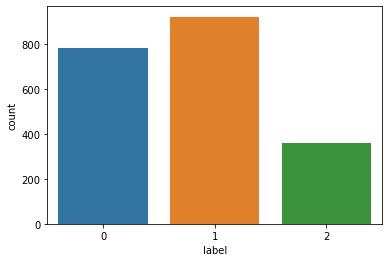

In [9]:
sns.countplot(x = 'label',data =df)

In [10]:
des_tree = DecisionTreeClassifier()

In [11]:
des_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
# Training Accuracy
des_tree.score(x_train,y_train)

0.9993065187239945

In [13]:
y_pred = des_tree.predict(x_test)

In [14]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[178,  38,  19],
       [ 34, 221,  21],
       [ 15,  27,  65]], dtype=int64)

In [15]:
#test_accuracy
accuracy_score(y_test,y_pred)

0.7508090614886731

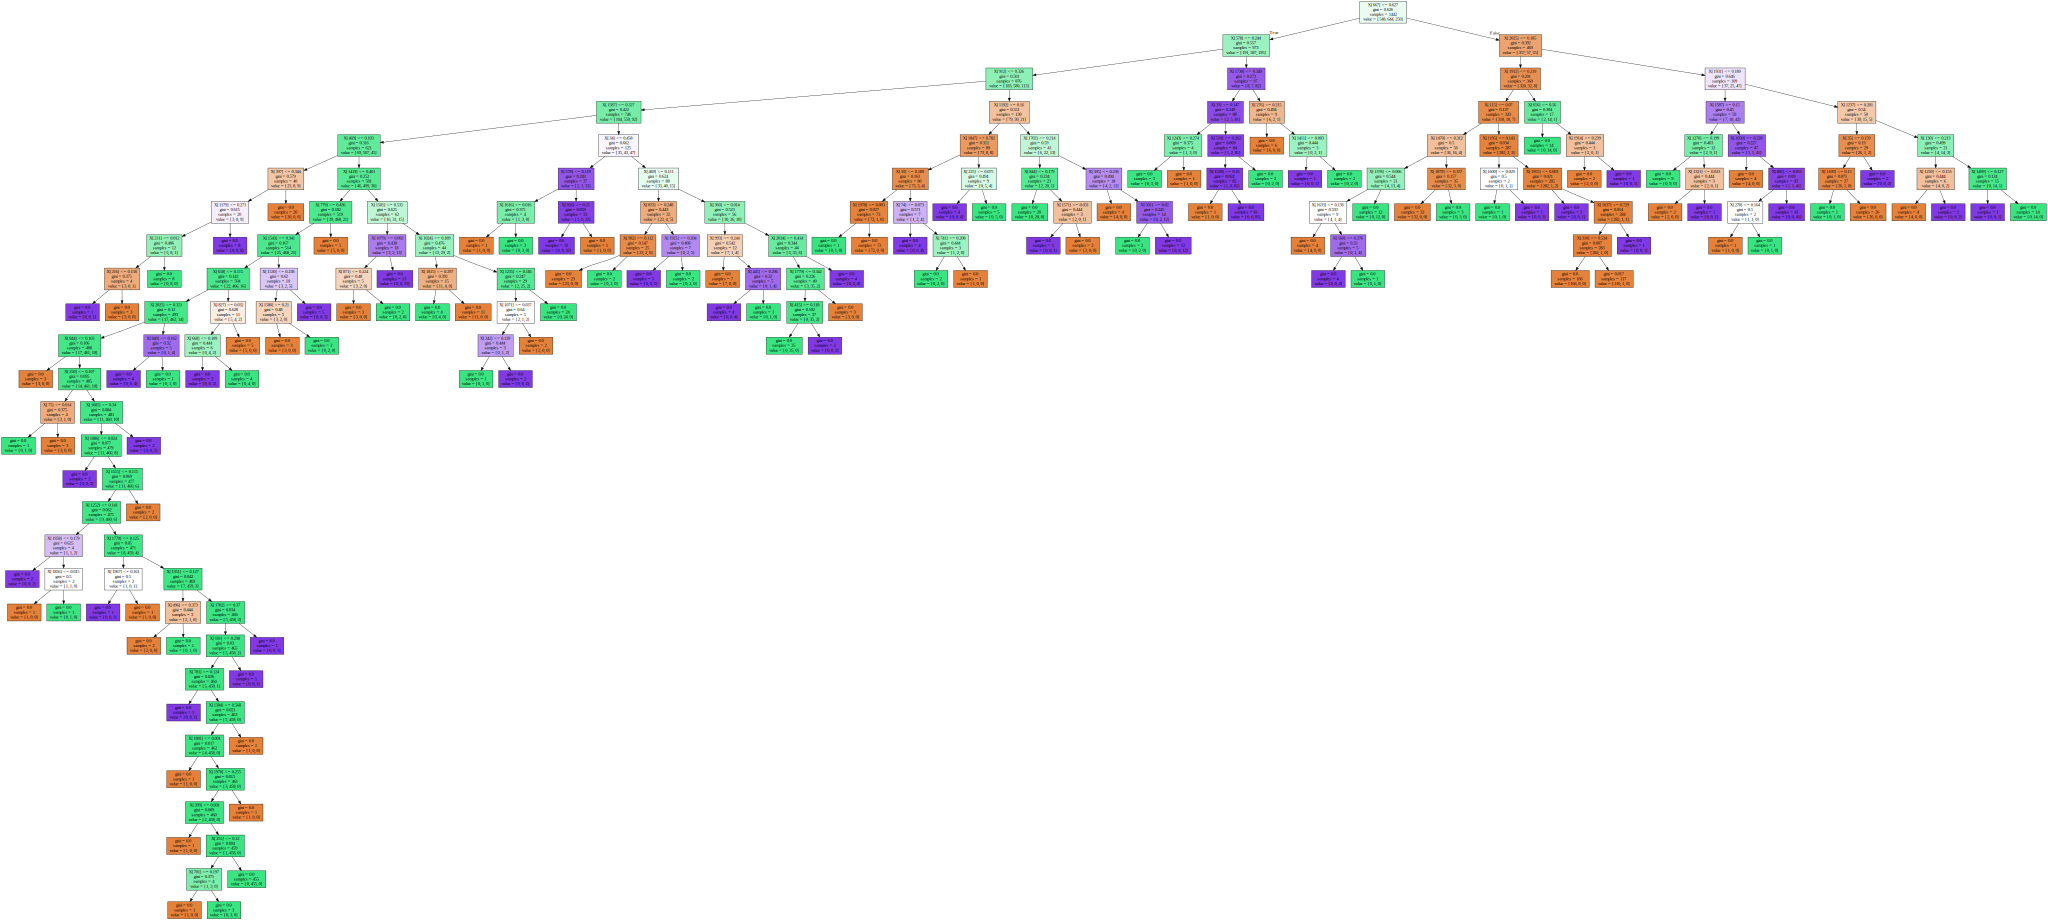

In [16]:
data = export_graphviz(des_tree,filled=True,special_characters=False)
graph =graphviz.Source(data)
graph

In [17]:
graph.render()

'Source.gv.pdf'

### train accuracy is 99.9% and test accuracy is 72% ,i.e my model is highly overfitted

#### so, in this situation we need to do some hyper parameter tuning or some ensemble technique

In [18]:
# Hyperparameter Tuning
parameters = {'max_depth':np.arange(1,8),'criterion':['gini', 'entropy']}

In [19]:
tune_model = GridSearchCV(des_tree,parameters,cv=10,scoring='accuracy')

In [20]:
tune_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7])},
             scoring='accuracy')

In [21]:
tune_model.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [22]:
#test accuracy for tune model
tune_model.score(x_test,y_test)

0.7621359223300971

### Now we use some ensemble(Random forest classifier) technique in order to boost this accurace

#### In random forest we built multiple trees, then we aggregate them and we predict the output by voting classifier

In [30]:
model_rf = RandomForestClassifier(n_estimators=50)

In [31]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [32]:
y_rf_pred =model_rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.8980582524271845

### So we have increased the accuracy from 76% to 90%

In [33]:
mat = confusion_matrix(y_test,y_rf_pred)
mat

array([[212,  23,   0],
       [  4, 270,   2],
       [  7,  27,  73]], dtype=int64)

In [34]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       235
           1       0.84      0.98      0.91       276
           2       0.97      0.68      0.80       107

    accuracy                           0.90       618
   macro avg       0.92      0.85      0.88       618
weighted avg       0.91      0.90      0.90       618



In [35]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1de13d55af0>)

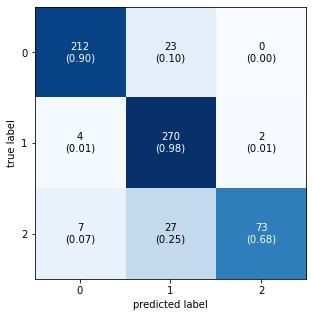

In [37]:
plot_confusion_matrix(mat,figsize=(5,5),show_normed=True)

### class-0 is correctly predict 90% time
### class-1 is correctly predict 98% time
### class-2 is correctly predict 73% time